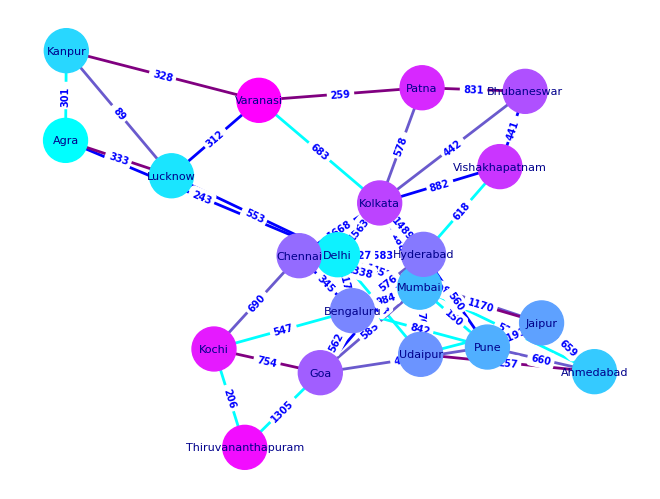

<Figure size 2000x500 with 0 Axes>

In [2]:
import numpy as np 
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt
import math
import queue
df = pd.read_csv('indian-cities-dataset.csv')

G = nx.Graph()
# Values are the weights of the edges
G.add_weighted_edges_from(df.values)

# spring_layout is used to position the nodes 
pos = nx.spring_layout(G)

# color nodes based on their degree
node_colors = range(len(G.nodes)) 

# Draw the graph 
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, edge_color= ['blue','purple','cyan','slateblue'], linewidths=1, width = 2,font_size= 8, cmap='cool', font_color='darkblue')

# Draw the edge labels

edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels , font_color='blue', font_size=7, font_weight='bold')


plt.figure(figsize=(20, 5)) 
plt.show()

In [3]:
def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def astar(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((0 + heuristic[start], [start]))  # Initial state: f = g + h = 0 + heuristic

    while not pri_queue.empty():
        f, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path  # Goal found

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                g = graph[current_node][neighbor]['weight']  # Cost from start to current node
                new_path = current_path + [neighbor]
                pri_queue.put((g + heuristic[neighbor], new_path))

    return [] 

In [4]:
source_node = input("Enter the source node:")
goal_node = input("Enter the goal node:")
heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}
path = astar(G, source_node, goal_node, heuristic)
print("path from {} to {} is {}".format(source_node,goal_node,path))
distance = 0
if path:
    for i in range(len(path)-1):
         distance +=G[path[i]][path[i+1]]['weight']
print("Distance is {} km".format(distance))



path from Agra to Goa is ['Agra', 'Delhi', 'Jaipur', 'Udaipur', 'Ahmedabad', 'Mumbai', 'Pune', 'Goa']
Distance is 2323 km
